# Classification

In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/penguins_raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [9]:
df = df[['Species', 'Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)',
   'Body Mass (g)']]

df.columns = ['species', 'culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']

df['species'] = df['species'].apply(lambda x: x.split()[0])

In [10]:
df.head()

,species,culmen_length,culmen_depth,flipper_length,body_mass
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [11]:
df.species.value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [40]:
adelie_df = df[df['species']=='Adelie']
gentoo_df = df[df['species']=='Gentoo']
chinstrap_df = df[df['species']=='Chinstrap']

The measurements will be most useful for classification if there are substantial differences between species and small variation within species.

### CDF for culmen_length

#### Adelie

In [113]:
df.describe()

,culmen_length,culmen_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [136]:
# Estimate mean and std of culmen_length for each species
mean_adelie, std_adelie = stats.norm.fit(adelie_df['culmen_length'])
mean_gentoo, std_gentoo = stats.norm.fit(gentoo_df['culmen_length'])
mean_chin, std_chin = stats.norm.fit(chinstrap_df['culmen_length'])


# Create possible values (quantities) for culmen_length
qs = np.linspace(start=df.culmen_length.min(), stop=df.culmen_length.max(), num=30)

cdf_adelie = stats.norm.cdf(qs, loc=mean_adelie, scale=std_adelie)
cdf_gentoo = stats.norm.cdf(qs, loc=mean_gentoo, scale=std_gentoo)
cdf_chin = stats.norm.cdf(qs, loc=mean_chin, scale=std_chin)

adelie_series = pd.Series(data=cdf_adelie, index=qs)
gentoo_series = pd.Series(data=cdf_gentoo, index=qs)
chin_series = pd.Series(data=cdf_chin, index=qs)

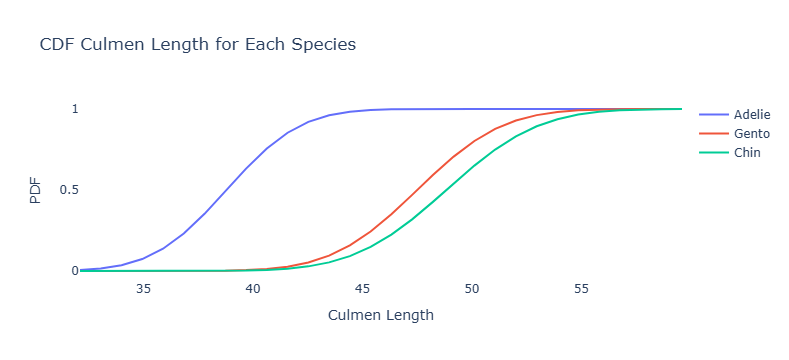

In [137]:
fig = go.Figure()

fig.add_trace(
    go.Line(
        x=adelie_series.index,
        y=adelie_series,
        mode='lines',
        name='Adelie'
    )
)

fig.add_trace(
    go.Line(
        x=gentoo_series.index,
        y=gentoo_series,
        mode='lines',
        name='Gento'
    )
)

fig.add_trace(
    go.Line(
        x=chin_series.index,
        y=chin_series,
        mode='lines',
        name='Chin'
    )
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    title='CDF Culmen Length for Each Species',
    xaxis_title='Culmen Length',
    yaxis_title='PDF'
)

It looks like we can use culmen length to identify Adelie penguins, but the distributiion for the other two species almost entirely overlap.

In [138]:
mean_adelie, std_adelie = stats.norm.fit(adelie_df['flipper_length'])
mean_gentoo, std_gentoo = stats.norm.fit(gentoo_df['flipper_length'])
mean_chin, std_chin = stats.norm.fit(chinstrap_df['flipper_length'])

# use original df to cover all possible values of flipper length
qs = np.linspace(start=df['flipper_length'].min(),
                stop=df['flipper_length'].max(),
                num=30)

cdf_adelie = stats.norm.cdf(qs, loc=mean_adelie, scale=std_adelie)
cdf_gentoo = stats.norm.cdf(qs, loc=mean_gentoo, scale=std_gentoo)
cdf_chin = stats.norm.cdf(qs, loc=mean_chin, scale=std_chin)

adelie_series = pd.Series(data=cdf_adelie, index=qs)
gentoo_series = pd.Series(data=cdf_gentoo, index=qs)
chin_series = pd.Series(data=cdf_chin, index=qs)

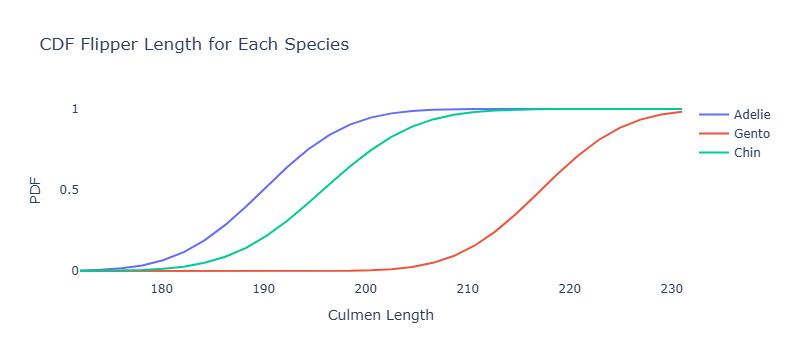

In [139]:
fig = go.Figure()

fig.add_trace(
    go.Line(
        x=adelie_series.index,
        y=adelie_series,
        mode='lines',
        name='Adelie'
    )
)

fig.add_trace(
    go.Line(
        x=gentoo_series.index,
        y=gentoo_series,
        mode='lines',
        name='Gento'
    )
)

fig.add_trace(
    go.Line(
        x=chin_series.index,
        y=chin_series,
        mode='lines',
        name='Chin'
    )
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    title='CDF Flipper Length for Each Species',
    xaxis_title='Culmen Length',
    yaxis_title='PDF'
)

Using flipper length, we can distinguish Gentoo penguins from the other two species. So with these two features, it seems like we should be able to classify penguins with some accuracy.

In [141]:
stats.norm.pdf(193, loc=mean_adelie, scale=std_adelie)

np.float64(0.05487494158668887)

In [143]:
stats.norm.pdf(193, loc=mean_chin, scale=std_chin)

np.float64(0.052044994828400935)

In [142]:
stats.norm.pdf(193, loc=mean_gentoo, scale=std_chin)

np.float64(0.00016448643355987643)

### Normal Model

In [146]:
def make_norm_map(df, colname, by='species'):
    norm_map = {}
    grouped = df.groupby(by)[colname]
    for species, group in grouped:
        mean = group.mean()
        std = group.std()
        norm_map[species] = stats.norm(mean, std)
    return norm_map

In [162]:
flipper_map = make_norm_map(df, 'flipper_length')
flipper_map, flipper_map.keys()

({'Adelie': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x76b9ff710b50>,
  'Chinstrap': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x76b9ff701ed0>,
  'Gentoo': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x76b9ff712310>},
 dict_keys(['Adelie', 'Chinstrap', 'Gentoo']))

In [150]:
flipper_map['Adelie'].pdf(193) # the pdf is slightly different with the pdf of adelie flipper length before. it's due to difference result between scipy and pandas computation

np.float64(0.054732511875530694)

In [161]:
data = 193
hypos = flipper_map.keys()
likelihood = [flipper_map[hypo].pdf(data) for hypo in hypos]
likelihood

[np.float64(0.054732511875530694),
 np.float64(0.05172135615888162),
 np.float64(5.8660453661990634e-05)]